<a href="https://colab.research.google.com/github/patrycjapiechowicz/hobby-projects/blob/main/Tensorflow_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card fraud detection - Classification problem


### Data overview
* transactions made by credit cards in September 2013 by european cardholders
* transactions that occurred in two days
* 492 frauds out of 284,807 transactions
* numerical input variables which are the result of a PCA transformation. 
* 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


Dataset from kaggle

In [2]:
#%load "g:/My Drive/fraud.py"

import pandas as pd
import numpy as np

#df = pd.read_csv("../../data/creditcard.csv")
#df.info()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122881 entries, 0 to 122880
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    122881 non-null  int64  
 1   V1      122881 non-null  float64
 2   V2      122881 non-null  float64
 3   V3      122881 non-null  float64
 4   V4      122881 non-null  float64
 5   V5      122881 non-null  float64
 6   V6      122881 non-null  float64
 7   V7      122881 non-null  float64
 8   V8      122881 non-null  float64
 9   V9      122881 non-null  float64
 10  V10     122880 non-null  float64
 11  V11     122880 non-null  float64
 12  V12     122880 non-null  float64
 13  V13     122880 non-null  float64
 14  V14     122880 non-null  float64
 15  V15     122880 non-null  float64
 16  V16     122880 non-null  float64
 17  V17     122880 non-null  float64
 18  V18     122880 non-null  float64
 19  V19     122880 non-null  float64
 20  V20     122880 non-null  float64
 21  V21     12

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Class")
y = df.Class


In [18]:
np.isnan(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122879,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.iloc[122880]

Time      76723.000000
V1           -1.708808
V2            0.777698
V3            1.059110
V4           -0.455618
V5            0.345712
V6           -0.893250
V7            1.396244
V8           -0.381813
V9           -0.300000
V10                NaN
V11                NaN
V12                NaN
V13                NaN
V14                NaN
V15                NaN
V16                NaN
V17                NaN
V18                NaN
V19                NaN
V20                NaN
V21                NaN
V22                NaN
V23                NaN
V24                NaN
V25                NaN
V26                NaN
V27                NaN
V28                NaN
Amount             NaN
Class              NaN
Name: 122880, dtype: float64

In [21]:
df=df.drop(index=122880)

In [22]:
np.isnan(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122878,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Class")
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                 test_size=.5,
                 random_state=42,stratify=y)

# %load "g:/My Drive/diamonds_preproc.py"
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. select labels of features for one hot encoding and standarization
num_labels = X_train.select_dtypes("number").columns
cat_labels = X_train.select_dtypes("object").columns

# 2. define preprocessor for each type of data
cat_preprocessor = OneHotEncoder(drop = "if_binary")
num_preprocessor = RobustScaler()

# 3. Combine it all together
preprocessor = ColumnTransformer([("cat", cat_preprocessor, cat_labels),
                                 ("num", num_preprocessor, num_labels)])

preprocessor.fit(X_train)

#feature_labels = preprocessor.transformers_[0][1].get_feature_names_out().tolist()
#feature_labels.extend(num_labels)
feature_labels = num_labels

X_train_prepd = preprocessor.transform(X_train)
X_train_prepd = pd.DataFrame(X_train_prepd,columns = feature_labels)

X_test_prepd = preprocessor.transform(X_test)
X_test_prepd = pd.DataFrame(X_test_prepd,columns = feature_labels)

In [24]:
# Simple sequential api
from tensorflow.keras import layers
from tensorflow import keras

neg, pos = np.bincount(y_train)
total = neg + pos

#gdy zbilansowany
#neg =100
#pos =100

initial_bias = np.log(pos/neg)
initial_bias = keras.initializers.Constant(initial_bias)
initial_bias

metrics_to_monitor = [
    keras.metrics.AUC(name = "auc"),
    keras.metrics.AUC(curve="PR", name = "prc")
]

In [25]:
def model_init():
    input_layer = layers.Input(shape = (X_train_prepd.shape[1],),name = "input")

    h1 = layers.Dense(64,activation = "relu", name = "h1")(input_layer)
    h2 = layers.Dense(64,activation = "relu", name = "h2")(h1)
    h3 = layers.Dense(64,activation = "relu", name = "h3")(h2)


    output_layer = layers.Dense(1,activation = "sigmoid", name = "out",
                                bias_initializer=initial_bias)(h3)

    model = keras.Model(input_layer, output_layer)
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = metrics_to_monitor)
    return model

In [26]:
from sklearn.utils.class_weight import compute_class_weight
wagi = compute_class_weight("balanced", classes=y_train.unique(),y= y_train)

In [27]:
import datetime
logs_path = "logs\\"+datetime.datetime.now().strftime("%H-%M-%S")

early = keras.callbacks.EarlyStopping(monitor = "val_prc",
                                  mode = "max",
                                  patience=30,
                                  restore_best_weights=True)
cb = [early]

In [28]:
model = model_init()

history = model.fit(X_train_prepd,
          y_train,
         batch_size=1024,
          epochs=100,
          validation_split=.2,
                   callbacks=cb,
                   verbose = 1,
                   class_weight={0: wagi[0],
                                1: wagi[1]})

Epoch 1/100
48/48 [==============================] - 2s 19ms/step - loss: 0.8296 - auc: 0.8865 - prc: 0.1486 - val_loss: 0.1129 - val_auc: 0.9514 - val_prc: 0.1029
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 0.3528 - auc: 0.9468 - prc: 0.1834 - val_loss: 0.0869 - val_auc: 0.9609 - val_prc: 0.2157
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 0.2770 - auc: 0.9559 - prc: 0.3151 - val_loss: 0.0402 - val_auc: 0.9238 - val_prc: 0.6402
Epoch 4/100
48/48 [==============================] - 0s 9ms/step - loss: 0.2140 - auc: 0.9736 - prc: 0.5335 - val_loss: 0.1211 - val_auc: 0.9570 - val_prc: 0.3234
Epoch 5/100
48/48 [==============================] - 1s 13ms/step - loss: 0.1594 - auc: 0.9849 - prc: 0.5356 - val_loss: 0.0856 - val_auc: 0.9307 - val_prc: 0.6304
Epoch 6/100
48/48 [==============================] - 1s 14ms/step - loss: 0.1195 - auc: 0.9921 - prc: 0.7345 - val_loss: 0.0777 - val_auc: 0.9242 - val_prc: 0.6872
Epoch 7/100
48/48 [

## Tuner

In [29]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00


In [30]:
from kerastuner import Objective
from kerastuner import RandomSearch, BayesianOptimization, Hyperband
from kerastuner.engine.hyperparameters import HyperParameters
hp = HyperParameters()

<ipython-input-30-b62ee0137ba6>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import Objective


In [31]:
np.arange(32,129,32)

array([ 32,  64,  96, 128])

In [32]:
max_trial = 10

In [33]:
early = keras.callbacks.EarlyStopping(monitor = "val_prc",
                                  mode = "max",
                                  patience=30,
                                  restore_best_weights=True)
cb = [early]

In [34]:
def model_init(hp):
    input_layer = layers.Input(shape = (X_train_prepd.shape[1],),name = "input")

    h = layers.Dense(hp.Int("h0_units",32,128,32),
                      activation = hp.Choice("h0_act",["relu","tanh","selu"]),
                      name = "h_0")(input_layer)
    
    for i in  range(hp.Int("n_layers",1,3)):
        h = layers.Dense(hp.Int(f"h{i}_units",32,128,32),
                      activation = hp.Choice(f"h{i}_act",["relu","tanh","selu"]),
                      name = f"h{i}")(h)



    output_layer = layers.Dense(1,activation = "sigmoid", name = "out",
                                bias_initializer=initial_bias)(h)

    model = keras.Model(input_layer, output_layer)
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = metrics_to_monitor)
    return model

In [35]:
tuner = RandomSearch(model_init, 
                     objective=Objective("val_prc", direction="max"),
                     max_trials=5,
                    overwrite=True)

In [36]:
tuner.search(X_train_prepd,
          y_train,
         batch_size=1024,
          epochs=100,
          validation_split=.2,
                   callbacks=cb,
            verbose = 2)

Trial 5 Complete [00h 00m 42s]
val_prc: 0.8081595301628113

Best val_prc So Far: 0.8081595301628113
Total elapsed time: 00h 03m 05s


In [37]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
h0_units: 32
h0_act: relu
n_layers: 3
h1_units: 64
h1_act: relu
h2_units: 32
h2_act: relu
Score: 0.8081595301628113
Trial summary
Hyperparameters:
h0_units: 32
h0_act: relu
n_layers: 1
h1_units: 96
h1_act: relu
Score: 0.8043986558914185
Trial summary
Hyperparameters:
h0_units: 128
h0_act: tanh
n_layers: 2
h1_units: 128
h1_act: selu
Score: 0.8034929633140564
Trial summary
Hyperparameters:
h0_units: 32
h0_act: selu
n_layers: 1
h1_units: 32
h1_act: relu
Score: 0.8030645251274109
Trial summary
Hyperparameters:
h0_units: 64
h0_act: relu
n_layers: 2
h1_units: 32
h1_act: relu
Score: 0.7916012406349182


In [38]:
best_model = tuner.get_best_models()[0]

In [39]:
y_test_pred = best_model.predict(X_test_prepd,batch_size=5000)

13/13 [==============================] - 0s 7ms/step


In [40]:
# %load "g:/My Drive/roc_prc.py"
def plot_roc(y_test, prob, model_name = ""):
    
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    
    fpr, recall, tresh = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    
    plt.plot(fpr, recall, label = "{} AUC = {}".format(model_name, auc.round(2)))
    plt.plot([0,1], [0,1], 'r--')
    plt.xlabel("FPR")
    plt.ylabel("Recall")
    plt.title("ROC Curve")
    plt.legend()
    
def plot_prc(y_test, prob, model_name = ""):
    
    from sklearn.metrics import precision_recall_curve, average_precision_score
    import matplotlib.pyplot as plt
    
    precision, recall, tresh = precision_recall_curve(y_test, prob)
    auc = average_precision_score(y_test, prob)
    
    plt.plot(precision, recall, label = "{} AUPRC = {}".format(model_name, auc.round(2)))
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("Precision-Recall Curve")
    plt.legend()


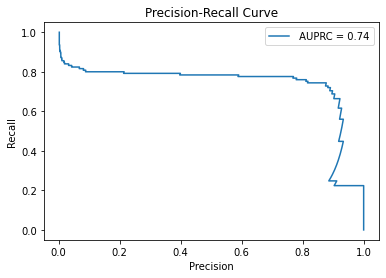

In [41]:
plot_prc(y_test,y_test_pred)